In [1]:
#thesis 1: few authors dominate the lists (winner takes all)
#thesis 2: few publishers dominate the lists (oligarchy)

In [1]:
#import dependencies
import psycopg2
import pandas as pd
import numpy as np

In [2]:
#pull data from the database
con = psycopg2.connect("dbname='nytimes'") 
cur = con.cursor()    
cur.execute("SELECT * FROM books")
rows = cur.fetchall()
con.close()

In [6]:
# import as a dataframe
data_frame = pd.DataFrame()
data_frame = pd.DataFrame(data = rows, columns=('id','title', 'isbn', 'author', 'list', 'rank', 'date', 'weeks on list', 'description', 'contributor', 'publisher', 'updated frequency' ) )
len(data_frame)

40406

In [119]:
#subdivide the data for quicker iteration in practice 
test_length = len(data_frame)
test_data = data_frame.sample(test_length)
len(test_data)

best_filter = test_data['list'] == 'Combined Print & E-Book Fiction'
#test_data = test_data[best_filter]
print len(test_data)

40406


In [16]:
# get the count by author
authors = test_data['author']
author_freq = authors.value_counts()
author_names = author_freq.keys()

In [17]:
# get the count by book
books = test_data['title']
book_freq = books.value_counts()
book_titles = book_freq.keys()

book_stats = pd.DataFrame(columns = ('title', 'score','author', 'author book count'))

counter = 0
for title in book_titles:
    filter_vector = (books == title)
    score = sum(6- test_data[filter_vector]['rank'])
    author = test_data[filter_vector]['author'].unique()[0]
    
    filter_vector = (authors == author)
    titles = test_data[filter_vector]['title']
    author_book_count = len(titles.unique())
    
    book_stats.loc[counter] = [title, score, author, author_book_count]
    counter += 1

print np.corrcoef(book_stats['score'], book_stats['author book count'])

[[ 1.         -0.06265231]
 [-0.06265231  1.        ]]


7.02777777778
12.3295454545


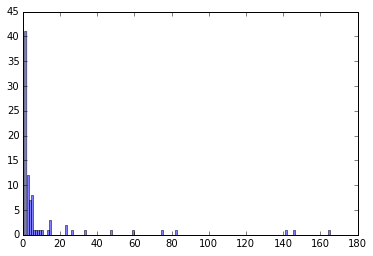

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

one_hitters = book_stats[(book_stats['author book count'] == 1)] 
winners = book_stats[(book_stats['author book count'] > 1)] 

plt.hist(one_hitters['score'], bins = 150, color = 'blue', alpha = .5)

print np.mean(winners['score'])
print np.mean(one_hitters['score'])

1085.0


(array([ 72.,   5.,   2.,   2.,   0.,   1.,   0.,   1.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   1.]),
 array([   1. ,    9.2,   17.4,   25.6,   33.8,   42. ,   50.2,   58.4,
          66.6,   74.8,   83. ,   91.2,   99.4,  107.6,  115.8,  124. ,
         132.2,  140.4,  148.6,  156.8,  165. ]),
 <a list of 20 Patch objects>)

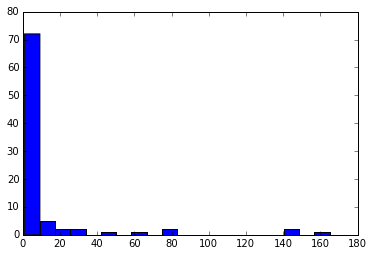

In [78]:

#plt.hist(book_stats['score'][book_stats['author book count'] == 1], bins = 30, color = 'red' )

selection = book_stats['author book count'] == 1
data_selection = book_stats[selection]['score'] 
print sum(data_selection)
plt.hist(data_selection, bins = 20)

In [93]:
mediocre_vector = book_stats['score'] < 5
mediocre_books = book_stats[mediocre_vector]
mediocre_books['score']
np.corrcoef(mediocre_books['score'], mediocre_books['author book count'])

array([[ 1.        ,  0.20032289],
       [ 0.20032289,  1.        ]])

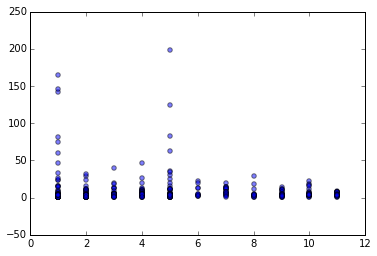

In [117]:
plt.scatter(book_stats['author book count'], book_stats['score'], alpha = 0.5)


In [120]:
test_data.to_csv('books.csv')